# Summary
Suppose the strategies are unbiased estimators of the form $\hat{N}(t) = a_1(C_{t-1}) + (1 - a_1)(C_{t-2})$ where $a_1$ is uniformly distributed between $x_{min}$ and $x_{max}$.  Using a memory window of length of 2, agents select an estimator as a function of the memory window $[C_4, C_3, C_2, C_1]$.  The estimator whose predictions for $C_1$ and $C_2$ have the lowest squared error is selected.  Each agent has $s$ strategies to pick from.

To find the probability that an agent attends the bar given a fixed strategy window depends on some intermediate variables that we can compute from the strategy distribution.  The attendance threshold, $t$, is given by

$$
t = \frac{60 - C_2}{C_1 - C_2}
$$

The probability that an arbitrary $a$ is less than $t$ is given by

$$q = \frac{t - x_{min}}{x_{max} - x_{min}}$$

Note that 
$$1 - q = \frac{x_{max} - t}{x_{max} - x_{min}}$$


The optimal $a$ that minimizes prediction error is
$$
a_0 = - \frac{(C_2 - C_3)(C_3 - C_1) + (C_3 - C_4)(C_4 - C_2)} {(C_2 - C_3)^2 + (C_3 - C_4)^2}
$$

In addition, the probability of an agent attending the bar may depend on the reflection of $x_{min}$ and $x_{max}$ across the threshold.  We let $r_\ell$ denote the reflection of $x_{max}$ across $a_0$.  Note that $r_\ell < a_0$ whenever $a_0$ is inside the window.  Likewise, let denote $r_r$ denote the reflection of $x_{min}$ across $a_0$.  Thus, $r_r$ will be to the right of $a_0$ whenever $a_0$ is in the window.  Then

$$
\begin{aligned}
r_\ell &= 2a_0 - x_{max} \\
&= -2 \frac{(C_2 - C_3)(C_3 - C_1) + (C_3 - C_4)(C_4 - C_2)} {(C_2 - C_3)^2 + (C_3 - C_4)^2} - x_{max}
\end{aligned}
$$

and 

$$
\begin{aligned}
r_r &= 2a_0 - x_{min} \\
&= -2 \frac{(C_2 - C_3)(C_3 - C_1) + (C_3 - C_4)(C_4 - C_2)} {(C_2 - C_3)^2 + (C_3 - C_4)^2} - x_{min}
\end{aligned}
$$

The probability that an agent will attend the bar should be

$$
p = \begin{cases}
 1 && (C_1 = C_2) \wedge (C_1 < 60)  && \text{(1) all predictions equal} \\
 1 && (t < x_{min}) \wedge (C_1 < C_2) && \text{(2) threshold outside window}\\
 1 && (t > x_{max}) \wedge (C_1 > C_2) && \text{(3) threshold outside window}\\
 0 && (C_1 = C_2) \wedge (C_1 > 60) && \text{(4) all predictions equal} \\
 0 && (t < x_{min}) \wedge (C_1 < C_2) && \text{(5) threshold outside window}\\
 0 && (t > x_{max}) \wedge (C_1 < C_2) && \text{(6) threshold outside window}\\
q && (C_2 = C_3 = C_4) \wedge (C_1 > C_2) && \text{(7) error function flat}\\
1 - q && (C_2 = C_3 = C_4) \wedge (C_1 < C_2) &&\text{(8) error function flat}\\
1 - q^s && t < r_\ell \wedge (C_1 < C_2)  &&\text{(9) no symmetric region}\\
q^s && t < r_\ell \wedge (C_1 > C_2) &&\text{(10) no symmetric region}\\
1 - (1 - q)^s && t > r_r \wedge C_1 > C_2 &&\text{(11) no symmetric region}\\
(1 - q)^s&& t > r_r \wedge C_1 < C_2 &&\text{(12) no symmetric region} \\
1 - \frac{1}{2} (1 - 2\frac{|t - a_0|}{x_{max} - x_{min}})^s - \frac{1}{2} \big( \frac{r_\ell - x_{min}} {x_{max} - x_{min}} \big)^s && 
    (x_{min} \leq r_\ell \leq t < a_0) \wedge (C_1 < C_2) && \text{(13) left asym, bottom goes}\\
1 - \frac{1}{2} (1 - 2\frac{|t - a_0|}{x_{max} - x_{min}})^s + \frac{1}{2} \big( \frac{r_\ell - x_{min}} {x_{max} - x_{min}} \big)^s && 
    (x_{min} \leq r_\ell \leq t) \wedge (t > a_0) \wedge (C_1 > C_2) && \text{(14) left asym, bottom and left go} \\ 
\frac{1}{2} (1 - 2\frac{|t - a_0|}{x_{max} - x_{min}})^s - \frac{1}{2} \big( \frac{r_\ell - x_{min}} {x_{max} - x_{min}} \big)^s && 
    (x_{min} \leq r_\ell \leq t) \wedge (t > a_0) \wedge (C_1 < C_2) && \text{(15) left asym, only symmetric goes} \\
\frac{1}{2} (1 - 2\frac{|t - a_0|}{x_{max} - x_{min}})^s + \frac{1}{2} \big( \frac{r_\ell - x_{min}} {x_{max} - x_{min}} \big)^s && 
    (x_{min} \leq r_\ell \leq t < a_0) \wedge (C_1 > C_2) && \text{(16) left asym, left goes} \\   
1 - \frac{1}{2} (1 - 2\frac{|t - a_0|}{x_{max} - x_{min}})^s - \frac{1}{2} \big( \frac{ x_{max} - r_r} {x_{max} - x_{min}} \big)^s && 
    (a_0 < t \leq r_r < x_{max}) \wedge (C_1 > C_2) && \text{(17) right asym, bottom goes} \\
1 - \frac{1}{2} (1 - 2\frac{|t - a_0|}{x_{max} - x_{min}})^s + \frac{1}{2} \big( \frac{ x_{max} - r_r} {x_{max} - x_{min}} \big)^s && 
    (t \leq r_r < x_{max}) \wedge (t < a_0) \wedge (C_1 < C_2) && \text{(18) right asym, bottom, right go} \\
\frac{1}{2} (1 - 2\frac{|t - a_0|}{x_{max} - x_{min}})^s - \frac{1}{2} \big( \frac{x_{max} - r_r} {x_{max} - x_{min}} \big)^s && 
    (a_0 < t \leq r_r < x_{max}) \wedge (C_1 < C_2) && \text{(19) right asym, only symmetric goes} \\
\frac{1}{2} (1 - 2\frac{|t - a_0|}{x_{max} - x_{min}})^s + \frac{1}{2} \big( \frac{x_{max} - r_r} {x_{max} - x_{min}} \big)^s && 
    (t \leq r_r < x_{max}) \wedge (t < a_0) \wedge (C_1 > C_2) && \text{(20) right asym, right goes} \\
\end{cases}
$$

The whole situation is a Markov process on the state space of history windows.  But this state space is big.  Can we get some insights by considering which cases will then lead to which other states?  Some may be unreachable.  Perhaps we can find an attractor where the system is drawn to a smaller subset of cases (probably the messiest!).

Let's go in order so we do the easy ones first

## (1) $C_1 = C_2 \wedge C_1 < 60$

In this case, the next window will look like $[y, x, x, 100]$, where $x < 60$ and $y$ could be anything.  So we will have $C_1 = 100 > C_2$.  The threshold will be at

$$
\frac{60 - 100}{100 - x} = \frac{-40}{100 - x} > \frac{-40}{40} = -1
$$

and 
$$
\frac{60 - 100}{100 - x} = \frac{-40}{100 - x} < \frac{-40}{100} = -0.4
$$

So

$$ -1 < t < - 0.4$$

If $x_{min} > -0.4$ we will get $[x,x,100,0]$ since $C_1 > C_2$ and thus the predictor is increasing.  

However, using the window $[-1,1]$, as we did in the simulation, we end up with $x_{min} < t < x_{max}$ and thus the threshold is within the window.  We will have

$$
\begin{aligned}
a_0 &= - \frac{(x - x)(x - 100) + (x - y)(y - x)} {(x - x)^2 + (x - y)^2} \\
&= \frac{(x - y)^2}{(x-y)^2} \\
&= 1
\end{aligned}
$$

This will mean that

$$
r_\ell = 2a_0 - x_{max} = 1
$$

and 
$$
r_r = 2a_0 - x_{min} = 3
$$

This brings us to the case (10) $(t < r_\ell) \wedge (C_1 > C_2)$.

## (2) $t < x_{min} \wedge (C_1 < C_2)$

Once again. agents attend with probability 1 so the next window will look like $[x, y, z, 100]$ where $z > y$. We also know that 

$$
\begin{aligned}
\frac{60-y}{z - y} &< x_{min} \\
60 - y &< x_{min}(z - y) \\
y &< \frac{x_{min} z - 60}{x_{min} - 1}
\end{aligned}
$$

Is this useful?  Probably not.

Anyway, the threshold will be

$$t = \frac{60 - z} {y - z}$$

So

$$
\begin{aligned}
y - z &< \frac{x_{min} z - 60}{x_{min} - 1} - z \\
y - z &< \frac{-60 - z}{x_{min} - 1}
\end{aligned}
$$

and thus

$$
t > \frac{(60 - z)(x_{min} - 1)}{-60 - z}
$$

In [275]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import binom


def err(hist, a):
    [c_4, c_3, c_2, c_1] = hist
    return (c_3 - c_1 + (c_2 - c_3) * a)**2 + (c_4 - c_2 + (c_3 - c_4) * a)**2


def pred(hist, a):
    [c_4, c_3, c_2, c_1] = hist
    return a * c_1 + (1 - a) * c_2


def plot_errs(hist):
    x = np.arange(-1, 1.01, 0.01)
    y = err(hist, x)
    going = pred(hist, x)

    mask = np.where(going < 60)
    plt.plot(x[mask],y[mask], color="blue")

    mask = np.where(going >= 60)
    plt.plot(x[mask],y[mask], color="orange")

    plt.xlabel("a")
    plt.ylabel("Error")
    plt.legend(["going", "not going"])
    _ = plt.title(hist)
    
    
def binom_p_value(k, n, p):
    if k < n * p:
        return binom.cdf(k, n, p)
    else:
        return binom.sf(k, n, p)

    
def assert_equal(a, b, msg):
    assert (np.abs(a - b) < 1e-6).all(), msg
    

def assert_less(a, b, msg):
    assert (a - b < 1e-6).all(), msg

    
def assert_geq(a,b,msg):
    assert (a - b > -1e-6).all(), msg


class BarModel:
    def __init__(
        self,
        hist, 
        s, 
        x_min, 
        x_max
    ):
        try:
            self.predict(hist, s, x_min, x_max)
        except AssertionError as E:
            self.error = E
            print(E)
        
    def predict(self, hist, s, x_min, x_max):
        # write the errors as a quadratic eqation
        [c_4, c_3, c_2, c_1] = hist

        self.a_1 = (c_2 - c_3)**2 + (c_3 - c_4)**2
        self.a_2 = 2 * ((c_2 - c_3) * (c_3 - c_1) + (c_3 - c_4) * (c_4 - c_2))
        self.a_3 = (c_3 - c_1)**2 + (c_4 - c_2)**2

        # check work
        x = np.arange(-1, 1.01, 0.01)
        y = err(hist, x)
        y_2 = (self.a_1 * x**2 + self.a_2 * x + self.a_3)

        assert_equal( (y_2 - y).max(), 0, "Check your coefficients!")
        
        # check for degenerate  case
        # when prediction is a constant
        # equal to c_1
        if c_1 == c_2:
            if c_1 < 60:
                self.p_go = 1
                self.case = 1
            else:
                self.p_go = 0
                self.case = 4
            return
        
        # threshold
        self.t = (60 - c_2) / (c_1 - c_2)

        # whether or not prediction is increasing
        # determines which regions of the map are going
        # this inequality follows from the predictor
        # for time t
        self.increasing = c_1 > c_2
        
        # threshold lower than entire window
        if self.t <= x_min:
            if self.increasing:
                self.p_go = 0
                self.case = 5
            else:
                self.p_go = 1
                self.case = 2
            return
        
        # threshold above entire window
        if self.t >= x_max:
            if self.increasing:
                self.p_go = 1
                self.case = 3
            else:
                self.p_go = 0
                self.case = 6
            return
        
        
        self.q = (self.t - x_min) / (x_max - x_min)
        
        # when err function is a constant
        # when a_1 is 0, a_2 should also be 0
        # so this is convenient
        if self.a_1 == 0:
            assert self.a_2 == 0
    
            if self.increasing:
                self.p_go = self.q
                self.case = 7
            else:
                self.p_go = 1 - self.q
                self.case = 8
            return
            
        # optimal A is min of error curve
        self.opt_a = -self.a_2 / (2*self.a_1)

        assert_geq (y.min(), err(hist, self.opt_a), "Opt_a isn't minimum!")

        
        # is the bottom part going
        inc_going = self.increasing and self.t > self.opt_a
        dec_going = not self.increasing and self.t <= self.opt_a
        self.bottom_part_going = inc_going or dec_going
        
        # find coordinates of bottom region
        # reflection of threshold about *opt_a*
        self.t_ref  = 2 * self.opt_a - self.t

        assert_equal(self.opt_a - self.t_ref, self.t - self.opt_a, "reflected thresholds not symmetrical")
        
        # to get the bottom part we need the left-hand
        # and right-hand sides of the threshold
        self.t_l = min(self.t, self.t_ref)
        self.t_r = max(self.t, self.t_ref)

        assert_equal(self.opt_a - self.t_l, self.t_r - self.opt_a, "right and left thresholds not symmetrical")
        
        # reflection of LHS of window across threshold
        # this is the righthand boundary of the symmetric region
        self.ref_r = 2 * self.opt_a - x_min

        assert_equal(self.opt_a - x_min, self.ref_r - self.opt_a, "ref_r not symmetrical")

        # reflection of RHS of window across threshold
        # this is the lefthand boundary of the symmetric region
        self.ref_l = 2 * self.opt_a - x_max

        assert_equal(x_max - self.opt_a, self.opt_a - self.ref_l, "ref_l not symmetrical")

        
        # For the remaining cases we can now
        # assume that threshold is inside of
        # the window

        # threshold to the left of all points other 
        # interesting things.
        # agents will always pick a > t
        # when possible
        if self.t < self.ref_l:
            # the probability that any is in the optimal region
            if self.increasing:
                self.p_go = self.q**s
                self.case = 10
            else:
                self.p_go = 1 - self.q**s
                self.case = 9
            return
        
        # threshold within window
        # but to the right of all points other 
        # interesting things.
        # agents will always pick a <= t
        # when possible        
        if self.t > self.ref_r:
            if self.increasing:
                self.p_go = 1 - (1 - self.q)**s
                self.case = 11
            else:
                self.p_go = (1 - self.q)**s
                self.case = 12
            return
                
        # the remaining cases have a bottom region where the threshold
        # is closer to opt_a than either reflected boundary.  The bottom
        # region is the reflection of the threshold about opt_a.  The symmetric
        # region is the area between the reflected threshold and reflected
        # boundaries, where there is no preference between strategies
        # that attend the bar and those that do not.
        self.p_anything_bottom = 1 - (1 - 2 * np.abs(self.t - self.opt_a) / (x_max - x_min))**s
        
        # asymmetric region is on left
        if x_min <= self.ref_l:
            self.p_all_left_asym = ((self.ref_l - x_min) / (x_max - x_min))**s
            self.p_sym = 1 - self.p_anything_bottom - self.p_all_left_asym
            
            assert_geq(self.p_sym, 0, f"Negative probability of {self.p_sym}!  Oh no!")
            
            # bottom goes, left side doesn't
            if self.t < self.opt_a and not self.increasing:
                self.case = 13
                self.p_go = self.p_anything_bottom + 0.5 * self.p_sym
                
            # bottom and left side go
            elif self.t > self.opt_a and self.increasing:
                self.case = 14
                self.p_go = 1 - 0.5 * self.p_sym
                
            # only symmetric region can go
            elif self.t > self.opt_a:
                self.case = 15
                self.p_go = 0.5 * self.p_sym
                
            # left side goes, bottom does not
            else:
                self.case = 16
                self.p_go = 0.5 * self.p_sym + self.p_all_left_asym
                
            return
                
        if x_max > self.ref_r:
            self.p_all_right_asym = ((x_max - self.ref_r) / (x_max - x_min))**s
            self.p_sym = 1 - self.p_anything_bottom - self.p_all_right_asym
            
            assert_geq(self.p_sym, 0, f"Negative probability of {self.p_sym}!  Fiddlesticks!")
            
            # bottom goes, right side doesn't
            if self.t > self.opt_a and self.increasing:
                self.p_go = self.p_anything_bottom + 0.5 *self.p_sym
                self.case = 17
                
            # bottom and right side go
            elif self.t < self.opt_a and not self.increasing:
                self.p_go = 1 - 0.5 * self.p_sym
                self.case = 18
                
            # right side goes, bottom doesn't
            elif self.t > self.opt_a and not self.increasing:
                self.p_go = self.p_all_right_asym + 0.5 * self.p_sym
                self.case = 19
                
            # only symmetric region can go
            elif self.t < self.opt_a and self.increasing:
                self.p_go = 0.5 * self.p_sym
                self.case = 20
                
            else:
                assert False, "WTF???"
            return
        else:
            assert False, "Missing case!"


def make_strategies(rng, strategies, memory):
    # weights should sum to 1
    # essentially, we are partitioning the [0,1] interval
    # and taking the size of each sub-interval
    # TODO: add negative weights?
    w = rng.uniform(-1, 1, size=(strategies, memory-1))
    w.sort(axis=1)
    offsets = np.hstack([w[:, :], np.ones(shape=(strategies,1))])
    return offsets - np.hstack([np.zeros(shape=(strategies,1)), w[:, :]])

def run_test(
    start,
    agents,
    strategies,
    trials,
    seed
):
    # number of weeks back in predictor function
    # AND number of weeks back to look when selecting a predictor
    memory = 2
    # number of rounds to run the simulation
    n_iter = 1
    threshold = 60
    
    x_min = -1
    x_max = 1
    
    model = BarModel(start, strategies, x_min, x_max)
    p = model.p_go
    print(f"Case: {model.case}")
    print(f"We expect agents to attend with probability {p}.")
    print(f"Total weekly attendance should have mean {agents * p} and variance {agents * p * (1-p)}")
    
    results = np.empty(trials)

    rng = np.random.default_rng(seed)

    for tr in range(trials):
        # each row is a strategy
        strats = [
            make_strategies(rng, strategies, memory) for _ in range(agents)
        ]

        # weekly attendance count
        # the first 2*memory weeks are randomly generated
        # to seed the strategies
        hist = np.hstack([start, np.zeros(n_iter)]).astype(int)

        # index of week
        # we need some starting history to begin making selections
        t = memory * 2

        # Record the index of the optimal strategy 
        # on each iteration.
        # each row corresponds to an agent
        # each column corresponds to a week
        best_strats = np.zeros((agents, len(hist)))

        # record each agent's prediction on each iteration
        pred_history = np.zeros((agents, len(hist)))

        # construct time windows for evaluating strategies

        # The columns begin at
        # t - m - 1 
        # t - m
        # ...
        # t - 1
        # t
        # as you go down the column you are looking back
        # to that week's history.
        # so the column beginning at *t - m - 1*
        # generates the prediction for week *t - m*
        # and the rightmost column generates a
        # prediction for next week.
        windows = np.vstack([
            hist[t-memory-i-1: t-i]
            for i in range(memory)
        ])

        for agent in range(agents):
            strat = strats[agent]
            # each row is a strategy
            # each column is predicted attendance
            # in increasing order.
            # the last column has the prediction for
            # next week
            predictions = strat.dot(windows)

            # these are the observations that we use to
            # to test our predictions.
            # note that the observation from column 0
            # is not used since its prediction would come
            # from a previous week's history.
            observations = windows[0, 1:]

            # calculate the absolute error of predictions
            # here, we discard the rightmost prediction as
            # this is the prediction for the future.
            # if we knew the correct answer for that,
            # we wouldn't need to predict it!
            errs = ((predictions[:, :-1] - observations)**2).sum(axis=1)

            best_strat = np.argmin(errs)
            best_strats[agent, t] = best_strat

            pred = strat[best_strat].dot(windows[:,-1])
            pred_history[agent, t] = pred

        hist[t] = (pred_history[:, t] < threshold).sum()
        results[tr] = hist[t]

    plt.figure()
    plt.hist(results)

    print(f"Average attendance: {results.mean()}")
    print(f"Variance of attendance: {results.var()}")
    
    # individual trials have attendance distributed
    # binom(agents, p)
    
    # attendance of the full experiment should be distributed
    # binom(trials * agents, p)
    
    n = trials * agents
    print(f"P-value: {binom_p_value(results.sum(), n, p)}")

In [71]:
# save an example of each case for testing
cases = dict()
strategies = 2
rng = np.random.default_rng(27)
x_min = -1
x_max = 1

n_iter = 0
while n_iter < 10000 or len(cases) < 20:
    n_iter += 1
    start = rng.choice(100, size=(4,))
    model = BarModel(start, strategies, x_min, x_max)
    
    if model.case not in cases:
        cases[model.case] = start
    
cases

{3: array([ 0, 69, 21, 31]),
 13: array([98, 12, 59, 32]),
 17: array([43, 93, 19, 78]),
 15: array([74,  1, 90, 19]),
 6: array([31, 29, 98, 94]),
 19: array([29, 40, 64, 18]),
 11: array([39, 86,  0, 90]),
 9: array([45, 75, 65, 26]),
 10: array([16, 11, 74, 89]),
 2: array([24, 97, 22,  1]),
 5: array([72,  0, 90, 99]),
 4: array([ 7, 83, 95, 95]),
 12: array([77, 68, 90, 29]),
 16: array([37,  0, 51, 65]),
 14: array([14, 99, 16, 77]),
 1: array([87, 89,  0,  0]),
 18: array([46,  1, 54,  5]),
 20: array([77, 77, 67, 79]),
 7: array([ 9,  9,  9, 77]),
 8: array([71, 71, 71,  4])}

Case: 1
We expect agents to attend with probability 1.
Total weekly attendance should have mean 100 and variance 0
Average attendance: 100.0
Variance of attendance: 0.0
P-value: 0.0


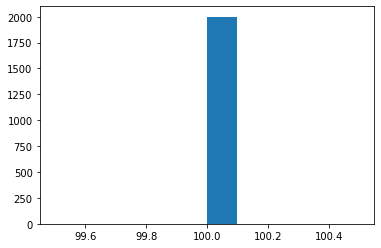

In [72]:
agents = 100
strategies = 2
trials = 2000
seed = 5678

start = cases[1]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 2
We expect agents to attend with probability 1.
Total weekly attendance should have mean 100 and variance 0
Average attendance: 100.0
Variance of attendance: 0.0
P-value: 0.0


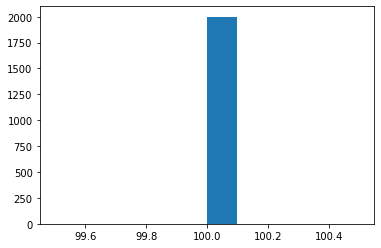

In [73]:
start = cases[2]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 3
We expect agents to attend with probability 1.
Total weekly attendance should have mean 100 and variance 0
Average attendance: 100.0
Variance of attendance: 0.0
P-value: 0.0


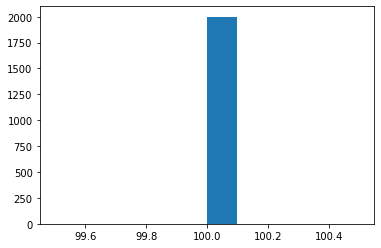

In [74]:
start = cases[3]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 4
We expect agents to attend with probability 0.
Total weekly attendance should have mean 0 and variance 0
Average attendance: 0.0
Variance of attendance: 0.0
P-value: 0.0


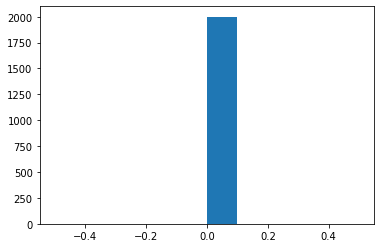

In [75]:
start = cases[4]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 6
We expect agents to attend with probability 0.
Total weekly attendance should have mean 0 and variance 0
Average attendance: 0.0
Variance of attendance: 0.0
P-value: 0.0


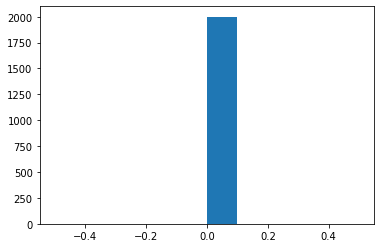

In [77]:
start = cases[6]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 7
We expect agents to attend with probability 0.875.
Total weekly attendance should have mean 87.5 and variance 10.9375
Average attendance: 87.496
Variance of attendance: 11.610984
P-value: 0.4794427602577509


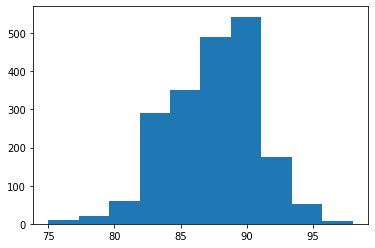

In [78]:
start = cases[7]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 8
We expect agents to attend with probability 0.417910447761194.
Total weekly attendance should have mean 41.7910447761194 and variance 24.326130541323234
Average attendance: 41.9315
Variance of attendance: 25.12880775
P-value: 0.10102364096416097


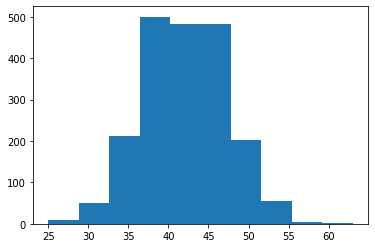

In [79]:
start = cases[8]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 9
We expect agents to attend with probability 0.6817882971729126.
Total weekly attendance should have mean 68.17882971729125 and variance 21.69530150109728
Average attendance: 68.205
Variance of attendance: 21.583975
P-value: 0.3999803388246817


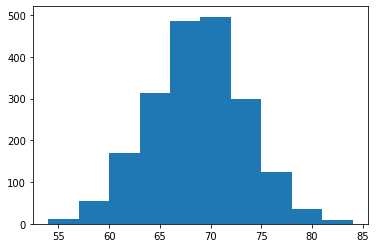

In [80]:
start = cases[9]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 10
We expect agents to attend with probability 0.0011111111111111107.
Total weekly attendance should have mean 0.11111111111111106 and variance 0.11098765432098762
Average attendance: 0.107
Variance of attendance: 0.11055100000000001
P-value: 0.3049838551286823


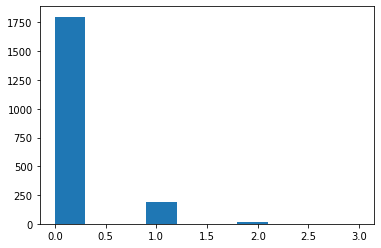

In [81]:
start = cases[10]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 11
We expect agents to attend with probability 0.9722222222222222.
Total weekly attendance should have mean 97.22222222222221 and variance 2.7006172839506184
Average attendance: 97.251
Variance of attendance: 2.668999
P-value: 0.21501440975243166


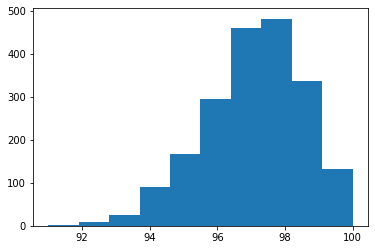

In [82]:
start = cases[11]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 12
We expect agents to attend with probability 0.06456597688793332.
Total weekly attendance should have mean 6.456597688793332 and variance 6.039721151644018
Average attendance: 6.511
Variance of attendance: 6.2698789999999995
P-value: 0.1599798852388341


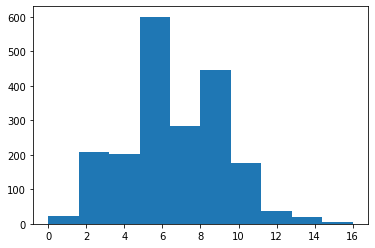

In [83]:
start = cases[12]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 13
We expect agents to attend with probability 0.7669906636099126.
Total weekly attendance should have mean 76.69906636099127 and variance 17.87159855451385
Average attendance: 76.7435
Variance of attendance: 17.52170775
P-value: 0.31834557978203154


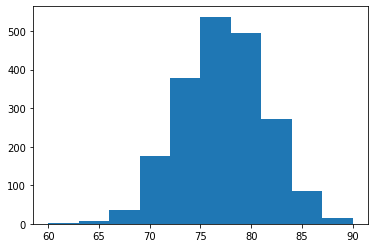

In [84]:
start = cases[13]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 14
We expect agents to attend with probability 0.9217542591049495.
Total weekly attendance should have mean 92.17542591049495 and variance 7.2123344926835165
Average attendance: 92.2015
Variance of attendance: 7.281897749999999
P-value: 0.33090577452076864


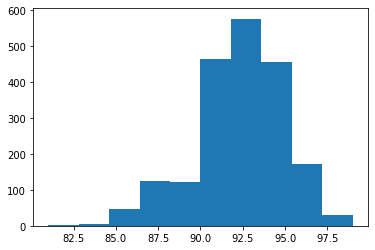

In [85]:
start = cases[14]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 15
We expect agents to attend with probability 0.18564748683437327.
Total weekly attendance should have mean 18.564748683437326 and variance 15.118249746645446
Average attendance: 18.4565
Variance of attendance: 14.34710775
P-value: 0.10702541623728301


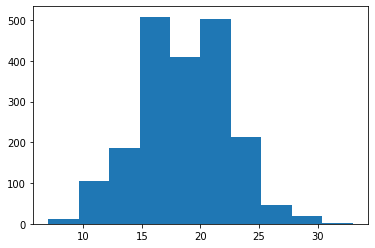

In [86]:
start = cases[15]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 16
We expect agents to attend with probability 0.6884092376108741.
Total weekly attendance should have mean 68.84092376108741 and variance 21.450195918288916
Average attendance: 68.8985
Variance of attendance: 22.49319775
P-value: 0.28836619238222877


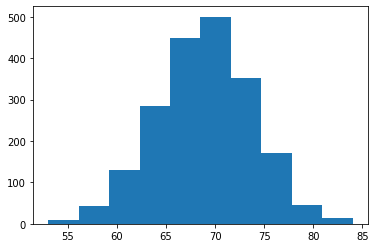

In [87]:
start = cases[16]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 17
We expect agents to attend with probability 0.9567768546283218.
Total weekly attendance should have mean 95.67768546283219 and variance 4.135490507585693
Average attendance: 95.7095
Variance of attendance: 3.889109750000001
P-value: 0.2406228677214996


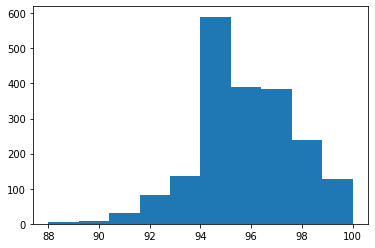

In [88]:
start = cases[17]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 18
We expect agents to attend with probability 0.5880845917014649.
Total weekly attendance should have mean 58.808459170146484 and variance 24.22411047047862
Average attendance: 58.861
Variance of attendance: 23.051679
P-value: 0.31576485485197175


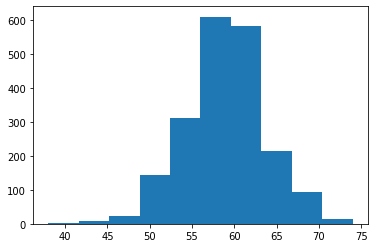

In [89]:
start = cases[18]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 19
We expect agents to attend with probability 0.27159231221122826.
Total weekly attendance should have mean 27.159231221122827 and variance 19.782992815898698
Average attendance: 27.2915
Variance of attendance: 19.59452775
P-value: 0.09140700850910637


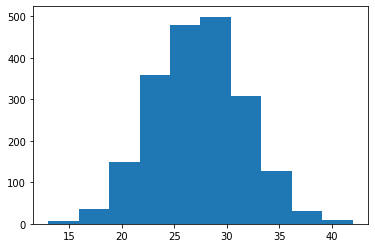

In [90]:
start = cases[19]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 20
We expect agents to attend with probability 0.1701388888888889.
Total weekly attendance should have mean 17.01388888888889 and variance 14.119164737654323
Average attendance: 16.8575
Variance of attendance: 14.426193750000003
P-value: 0.03144715492472763


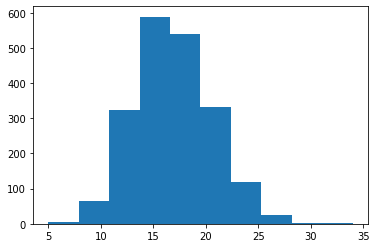

In [91]:
start = cases[20]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

In [ ]:
## Double check the unlikely P-Values with a different seed

Case: 20
We expect agents to attend with probability 0.1701388888888889.
Total weekly attendance should have mean 17.01388888888889 and variance 14.119164737654323
Average attendance: 17.023
Variance of attendance: 14.262470999999998
P-value: 0.4553880636800196


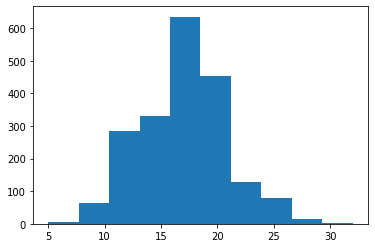

In [92]:
seed = 29

start = cases[20]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 19
We expect agents to attend with probability 0.27159231221122826.
Total weekly attendance should have mean 27.159231221122827 and variance 19.782992815898698
Average attendance: 27.227
Variance of attendance: 20.403470999999996
P-value: 0.24695227545205375


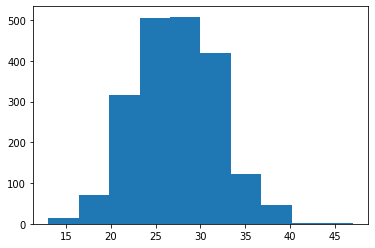

In [93]:
start = cases[19]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 15
We expect agents to attend with probability 0.18564748683437327.
Total weekly attendance should have mean 18.564748683437326 and variance 15.118249746645446
Average attendance: 18.4535
Variance of attendance: 14.60183775
P-value: 0.10079028760589871


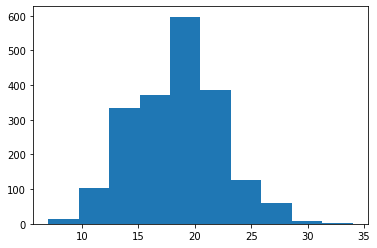

In [94]:
start = cases[15]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 15
We expect agents to attend with probability 0.18564748683437327.
Total weekly attendance should have mean 18.564748683437326 and variance 15.118249746645446
Average attendance: 18.555
Variance of attendance: 14.722974999999998
P-value: 0.4567376442417584


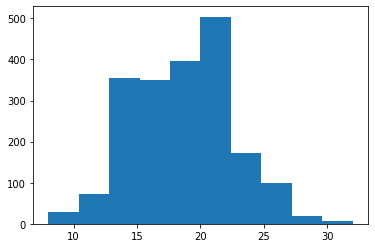

In [95]:
seed = 493
start = cases[15]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 8
We expect agents to attend with probability 0.417910447761194.
Total weekly attendance should have mean 41.7910447761194 and variance 24.326130541323234
Average attendance: 41.9975
Variance of attendance: 24.648493750000004
P-value: 0.030468598545449543


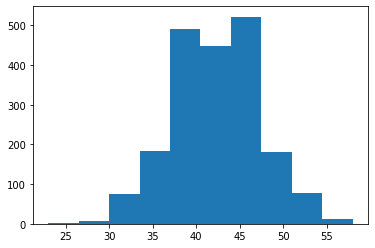

In [96]:
start = cases[8]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

Case: 8
We expect agents to attend with probability 0.417910447761194.
Total weekly attendance should have mean 41.7910447761194 and variance 24.326130541323234
Average attendance: 41.721
Variance of attendance: 23.838159
P-value: 0.26343984581828606


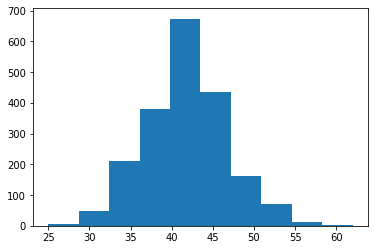

In [97]:
seed = 9
start = cases[8]

run_test(
    start,
    agents,
    strategies,
    trials,
    seed
)

What happens if we iterate the map a bunch of times?  Will we find fixed points?

## Iterating the map

In [124]:
from util import detect_cycle

In [148]:
start = [83,26,32,78]
n = 1000
hist = np.zeros(shape=n + 4)
hist[:4] = start

for i in range(4, n+4):
    model = BarModel(hist[i-4:i], strategies, x_min, x_max)
    hist[i] = int(model.p_go * agents)

In [149]:
detect_cycle(hist, 2)

75

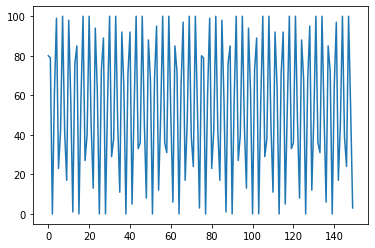

In [150]:
plt.plot(hist[-150:])

In [152]:
cycle = hist[-75:]
cycle

array([ 80.,  79.,   0.,  61.,  99.,  23.,  42., 100.,  42.,  17.,  98.,
        58.,   1.,  76.,  85.,   0.,  58., 100.,  27.,  40., 100.,  44.,
        13.,  94.,  62.,   0.,  73.,  89.,   0.,  56., 100.,  29.,  38.,
       100.,  45.,  11.,  92.,  64.,   0.,  71.,  92.,   5.,  53., 100.,
        33.,  36., 100.,  47.,   8.,  88.,  68.,   0.,  68.,  95.,  12.,
        49., 100.,  36.,  31., 100.,  50.,   6.,  85.,  72.,   0.,  65.,
        97.,  17.,  46., 100.,  39.,  24., 100.,  54.,   3.])

Cycle length: 75


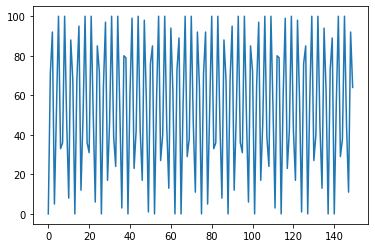

In [167]:
start = [0,0,0,0]
n = 1000
hist = np.zeros(shape=n + 4, dtype=int)
hist[:4] = start

for i in range(4, n+4):
    model = BarModel(hist[i-4:i], strategies, x_min, x_max)
    hist[i] = int(model.p_go * agents)
    
    
print(f"Cycle length: {detect_cycle(hist, 4)}")
plt.plot(hist[-150:])

In [189]:
def match_cycle(hist, cycle):
    offset = -1
    for i in range(71):
        if (hist[-75 + i: -71 + i] == cycle[:4]).all():
            offset = i
        
    if offset == -1:
        return False

    reset = np.hstack([hist[-75 + offset:], hist[-75:-75 + offset]])
    return (reset - cycle).max() == 0

match_cycle(hist, cycle)

False

Cycle length: 75


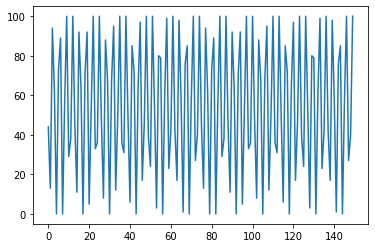

In [185]:
start = [80,20,80,20]
n = 1000
hist = np.zeros(shape=n + 4, dtype=int)
hist[:4] = start

for i in range(4, n+4):
    model = BarModel(hist[i-4:i], strategies, x_min, x_max)
    hist[i] = int(model.p_go * agents)
    
    
print(f"Cycle length: {detect_cycle(hist, 4)}")
assert match_cycle(hist, cycle), "Different cycle"
plt.plot(hist[-150:])

Cycle length: 75


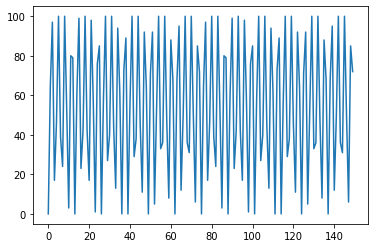

In [186]:
start = rng.choice(101, size=4)
n = 1000
hist = np.zeros(shape=n + 4, dtype=int)
hist[:4] = start

for i in range(4, n+4):
    model = BarModel(hist[i-4:i], strategies, x_min, x_max)
    hist[i] = int(model.p_go * agents)
    
    
print(f"Cycle length: {detect_cycle(hist, 4)}")
assert match_cycle(hist, cycle), "Different cycle"
plt.plot(hist[-150:])

Cycle length: 75


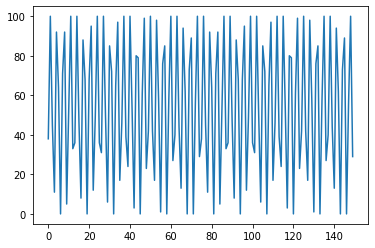

In [187]:
start = rng.choice(101, size=4)
n = 1000
hist = np.zeros(shape=n + 4, dtype=int)
hist[:4] = start

for i in range(4, n+4):
    model = BarModel(hist[i-4:i], strategies, x_min, x_max)
    hist[i] = int(model.p_go * agents)
    
    
print(f"Cycle length: {detect_cycle(hist, 4)}")
assert match_cycle(hist, cycle), "Different cycle"
plt.plot(hist[-150:])

In [299]:
strategies = 2
diff_cycles = []

for _ in range(500):
    start = rng.choice(101, size=4)
    n = 1000
    hist = np.zeros(shape=n + 4, dtype=int)
    hist[:4] = start

    for i in range(4, n+4):
        model = BarModel(hist[i-4:i], strategies, x_min, x_max)
        hist[i] = int(model.p_go * agents)

    is_match = False
    for result in diff_cycles:
        if match_cycle(hist, result["cycle"]):
            result["starts"].append(start)
            is_match = True
            break
    if not is_match:
        cycle_length = detect_cycle(hist, 2)
        if cycle_length != 75:
            print(f"Found cycle of length: {cycle_length}")
        diff_cycles.append({
            "cycle": hist[-cycle_length:],
            "starts": [start]
        })


len(diff_cycles)

1

In [300]:
for result in diff_cycles:
    print(result["cycle"])
    print(f'Cycle has length {len(result["cycle"])} and occurred {len(result["starts"])} times.\n\n')

[100  33  36 100  47   8  88  68   0  68  95  12  49 100  36  31 100  50
   6  85  72   0  65  97  17  46 100  39  24 100  54   3  80  79   0  61
  99  23  42 100  42  17  98  58   1  76  85   0  58 100  27  40 100  44
  13  94  62   0  73  89   0  56 100  29  38 100  45  11  92  64   0  71
  92   5  53]
Cycle has length 75 and occurred 500 times.




In [301]:
pd.Series(diff_cycles[0]["cycle"]).value_counts()

100    11
0       7
58      2
68      2
17      2
92      2
42      2
85      2
36      2
76      1
61      1
62      1
64      1
65      1
71      1
72      1
73      1
3       1
56      1
80      1
88      1
89      1
94      1
95      1
97      1
98      1
99      1
79      1
53      1
54      1
31      1
6       1
8       1
11      1
12      1
13      1
23      1
24      1
27      1
29      1
33      1
5       1
38      1
39      1
40      1
44      1
45      1
46      1
47      1
49      1
1       1
50      1
dtype: int64

In [ ]:
for result in diff_cycles: 
    assert (pd.Series(result["cycle"]).value_counts() == pd.Series(diff_cycles[0]["cycle"]).value_counts()).all()
    
print(f"All cycle have the same numbers!")
    

In [227]:
cnts = pd.Series(diff_cycles[0]["cycle"]).value_counts()
list(set(range(100)) - set(cnts.index))

[2,
 4,
 7,
 9,
 10,
 14,
 15,
 16,
 18,
 19,
 20,
 21,
 22,
 25,
 26,
 28,
 30,
 32,
 34,
 35,
 37,
 41,
 43,
 48,
 51,
 52,
 55,
 57,
 59,
 60,
 63,
 66,
 67,
 69,
 70,
 74,
 75,
 77,
 78,
 81,
 82,
 83,
 84,
 86,
 87,
 90,
 91,
 93,
 96]

What?!?!?!?!

So most starts get attracted to the same limit cycle.  A few have differrent cycles but all of them appear to have length 75 and contain the same numbers the same number of times (100 shows up 11 times, 0 7 times, 58 twice, 9 never).  Mysterious...

I wonder what happens when we change the number of strategies?

In [237]:
def match_cycle(hist, cycle):
    l = len(cycle)
    offset = -1
    for i in range(l):
        if (hist[-2*l + i: -2*l + i + 4] == cycle[:4]).all():
            offset = i

    if offset == -1:
        return False

    reset = np.hstack([hist[-l + offset:], hist[-l:-l + offset]])
    return (reset - cycle).max() == 0


diff_cycles = []
strategies = 10

for _ in range(500):
    start = rng.choice(101, size=4)
    n = 1000
    hist = np.zeros(shape=n + 4, dtype=int)
    hist[:4] = start

    for i in range(4, n+4):
        model = BarModel(hist[i-4:i], strategies, x_min, x_max)
        hist[i] = int(model.p_go * agents)

    is_match = False
    for result in diff_cycles:
        if match_cycle(hist, result["cycle"]):
            result["starts"].append(start)
            is_match = True
            break
    if not is_match:
        cycle_length = detect_cycle(hist, 2)
        if cycle_length != 75:
            print(f"Found cycle of length: {cycle_length}")
        diff_cycles.append({
            "cycle": hist[-cycle_length:],
            "starts": [start]
        })


len(diff_cycles)

Found cycle of length: 6
Found cycle of length: 6


2

In [238]:
for result in diff_cycles:
    print(f'Cycle has length {len(result["cycle"])} and occurred {len(result["starts"])} times.\n\n')

Cycle has length 6 and occurred 265 times.


Cycle has length 6 and occurred 235 times.




In [240]:
diff_cycles[0]["cycle"]

array([97, 99,  0, 97, 99,  0])

In [241]:
diff_cycles[1]["cycle"]

array([ 10,   0, 100,  10,   0, 100])

Okay well this is very different.  The cycle length still seems to be a constant but the numbers in it vary considerably.

In [242]:
diff_cycles = []
strategies = 5

for _ in range(500):
    start = rng.choice(101, size=4)
    n = 1000
    hist = np.zeros(shape=n + 4, dtype=int)
    hist[:4] = start

    for i in range(4, n+4):
        model = BarModel(hist[i-4:i], strategies, x_min, x_max)
        hist[i] = int(model.p_go * agents)

    is_match = False
    for result in diff_cycles:
        if match_cycle(hist, result["cycle"]):
            result["starts"].append(start)
            is_match = True
            break
    if not is_match:
        cycle_length = detect_cycle(hist, 2)
        if cycle_length != 75:
            print(f"Found cycle of length: {cycle_length}")
        diff_cycles.append({
            "cycle": hist[-cycle_length:],
            "starts": [start]
        })


len(diff_cycles)

Found cycle of length: 6
Found cycle of length: 6


2

In [248]:
for result in diff_cycles:
    print(f'Cycle has length {len(result["cycle"])} and occurred {len(result["starts"])} times.\n\n')
    
    

Cycle has length 6 and occurred 286 times.


Cycle has length 6 and occurred 214 times.




In [249]:
diff_cycles[0]["cycle"]

array([ 0, 83, 99,  0, 83, 99])

In [250]:
diff_cycles[1]["cycle"]

array([ 1, 99, 32,  1, 99, 32])

In [251]:
diff_cycles = []
strategies = 4

for _ in range(500):
    start = rng.choice(101, size=4)
    n = 1000
    hist = np.zeros(shape=n + 4, dtype=int)
    hist[:4] = start

    for i in range(4, n+4):
        model = BarModel(hist[i-4:i], strategies, x_min, x_max)
        hist[i] = int(model.p_go * agents)

    is_match = False
    for result in diff_cycles:
        if match_cycle(hist, result["cycle"]):
            result["starts"].append(start)
            is_match = True
            break
    if not is_match:
        cycle_length = detect_cycle(hist, 2)
        if cycle_length != 75:
            print(f"Found cycle of length: {cycle_length}")
        diff_cycles.append({
            "cycle": hist[-cycle_length:],
            "starts": [start]
        })


len(diff_cycles)

Found cycle of length: 6


1

In [252]:
for result in diff_cycles:
    print(f'Cycle has length {len(result["cycle"])} and occurred {len(result["starts"])} times.\n\n')

Cycle has length 6 and occurred 500 times.




In [253]:
diff_cycles[0]["cycle"]

array([76, 99,  0, 76, 99,  0])

In [254]:
diff_cycles = []
strategies = 3

for _ in range(500):
    start = rng.choice(101, size=4)
    n = 1000
    hist = np.zeros(shape=n + 4, dtype=int)
    hist[:4] = start

    for i in range(4, n+4):
        model = BarModel(hist[i-4:i], strategies, x_min, x_max)
        hist[i] = int(model.p_go * agents)

    is_match = False
    for result in diff_cycles:
        if match_cycle(hist, result["cycle"]):
            result["starts"].append(start)
            is_match = True
            break
    if not is_match:
        cycle_length = detect_cycle(hist, 2)
        if cycle_length != 75:
            print(f"Found cycle of length: {cycle_length}")
        diff_cycles.append({
            "cycle": hist[-cycle_length:],
            "starts": [start]
        })


len(diff_cycles)

Found cycle of length: 6
Found cycle of length: 6


2

In [255]:
for result in diff_cycles:
    print(f'Cycle has length {len(result["cycle"])} and occurred {len(result["starts"])} times.\n\n')
    
    

Cycle has length 6 and occurred 499 times.


Cycle has length 6 and occurred 1 times.




In [256]:
diff_cycles[0]["cycle"]

array([ 9, 63, 99,  9, 63, 99])

In [257]:
diff_cycles[1]["cycle"]

array([99, 10, 62, 99, 10, 62])

In [276]:
diff_cycles = []
strategies = 20

for _ in range(500):
    start = rng.choice(101, size=4)
    n = 1000
    hist = np.zeros(shape=n + 4, dtype=int)
    hist[:4] = start

    for i in range(4, n+4):
        model = BarModel(hist[i-4:i], strategies, x_min, x_max)
        hist[i] = int(model.p_go * agents)

    is_match = False
    for result in diff_cycles:
        if match_cycle(hist, result["cycle"]):
            result["starts"].append(start)
            is_match = True
            break
    if not is_match:
        cycle_length = detect_cycle(hist, 2)
        if cycle_length != 75:
            print(f"Found cycle of length: {cycle_length}")
        diff_cycles.append({
            "cycle": hist[-cycle_length:],
            "starts": [start]
        })


len(diff_cycles)

Found cycle of length: 6
Found cycle of length: 6


2

In [277]:
for result in diff_cycles:
    print(f'Cycle has length {len(result["cycle"])} and occurred {len(result["starts"])} times.\n\n')

Cycle has length 6 and occurred 283 times.


Cycle has length 6 and occurred 217 times.




In [278]:
diff_cycles[0]["cycle"]

array([ 0, 99, 99,  0, 99, 99])

In [279]:
diff_cycles[1]["cycle"]

array([  1,   0, 100,   1,   0, 100])

In [280]:
diff_cycles = []
strategies = 100

for _ in range(500):
    start = rng.choice(101, size=4)
    n = 1000
    hist = np.zeros(shape=n + 4, dtype=int)
    hist[:4] = start

    for i in range(4, n+4):
        model = BarModel(hist[i-4:i], strategies, x_min, x_max)
        hist[i] = int(model.p_go * agents)

    is_match = False
    for result in diff_cycles:
        if match_cycle(hist, result["cycle"]):
            result["starts"].append(start)
            is_match = True
            break
    if not is_match:
        cycle_length = detect_cycle(hist, 2)
        if cycle_length != 75:
            print(f"Found cycle of length: {cycle_length}")
        diff_cycles.append({
            "cycle": hist[-cycle_length:],
            "starts": [start]
        })


len(diff_cycles)

Found cycle of length: 6
Found cycle of length: 6


2

In [281]:
for result in diff_cycles:
    print(f'Cycle has length {len(result["cycle"])} and occurred {len(result["starts"])} times.\n\n')
    
    

Cycle has length 6 and occurred 286 times.


Cycle has length 6 and occurred 214 times.




What happens if we don't round attendance?  Will the system settle into a similar attractor?

In [282]:
diff_cycles = []
strategies = 3

for _ in range(500):
    start = rng.choice(101, size=4)
    n = 1000
    hist = np.zeros(shape=n + 4)
    hist[:4] = start

    for i in range(4, n+4):
        model = BarModel(hist[i-4:i], strategies, x_min, x_max)
        hist[i] = model.p_go * agents

In [283]:
hist[-20:]

array([1.00000000e+02, 1.89485369e+01, 3.95667179e+01, 1.00000000e+02,
       2.99494219e+01, 1.59244533e+01, 1.00000000e+02, 4.42657535e+01,
       5.00230989e+00, 9.73099139e+01, 5.35320340e+01, 2.19880077e+00,
       9.16546428e+01, 7.62008772e+01, 0.00000000e+00, 7.77120178e+01,
       9.61468158e+01, 7.53378816e-04, 6.74369632e+01, 9.93627035e+01])

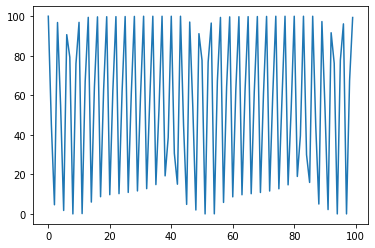

In [285]:
plt.plot(hist[-100:])

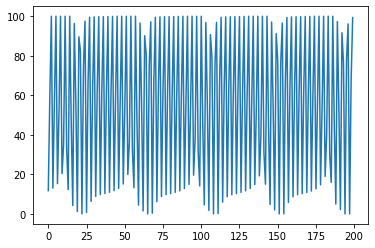

In [295]:
plt.plot(hist[-200:])

In [294]:
detect_cycle(np.round(hist, decimals=1), 4)

It appears that these length 3 cycles only happen because of rounding.  Without rounding the system appears to approach some much longer and more complicated cycle.

Okay this is bizarre.  For > 2 strategies, we always end up with a cycle of length 6.  For 5 and 10 strategies, we seem to have 2 different attractors that each pull in about half of the phase space.  With 3 and 4 strategies, there is one dominant attractor but a few  I.C. that wind up somewhere else.

How well do they compare to the actual simuulation?

[43 93 19 78]


/Users/rebecca/.pyenv/versions/3.9.5/envs/jupyter/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


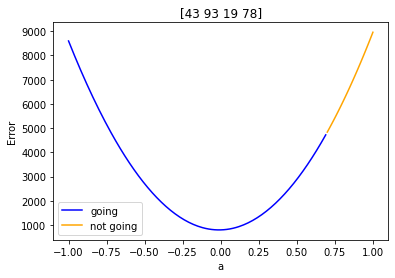

In [308]:
print(cases[17])
plot_errs(cases[17])

/Users/rebecca/.pyenv/versions/3.9.5/envs/jupyter/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


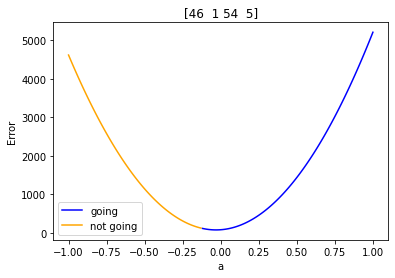

In [309]:
plot_errs(cases[18])

/Users/rebecca/.pyenv/versions/3.9.5/envs/jupyter/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


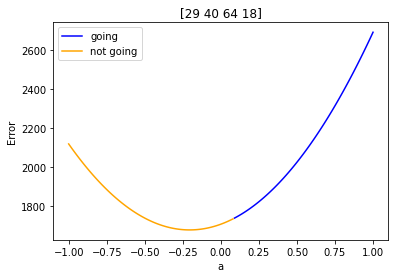

In [310]:
plot_errs(cases[19])

/Users/rebecca/.pyenv/versions/3.9.5/envs/jupyter/lib/python3.9/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


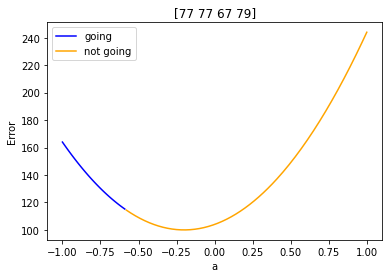

In [311]:
plot_errs(cases[20])

In [327]:
for case in range(1,21):
    m = BarModel(cases[case], strategies, x_min, x_max)
    try:
        print(f"Case {case} has optimal a value {m.opt_a}\n")
    except:
        print(f"Case {case} has no optimal a value\n")

Case 1 has no optimal a value

Case 2 has no optimal a value

Case 3 has no optimal a value

Case 4 has no optimal a value

Case 5 has no optimal a value

Case 6 has no optimal a value

Case 7 has no optimal a value

Case 8 has no optimal a value

Case 9 has optimal a value 1.09

Case 10 has optimal a value 1.157736604907361

Case 11 has optimal a value -0.22665278500780844

Case 12 has optimal a value -1.7256637168141593

Case 13 has optimal a value 0.4470588235294118

Case 14 has optimal a value 0.14141986679892304

Case 15 has optimal a value 0.032754716981132075

Case 16 has optimal a value 0.7045340050377834

Case 17 has optimal a value -0.011283851554663993

Case 18 has optimal a value -0.03061646669424907

Case 19 has optimal a value -0.20516499282639886

Case 20 has optimal a value -0.2



In [328]:
m = BarModel(cases[19], strategies, x_min, x_max)
m.opt_a

-0.20516499282639886

In [333]:
n = 100

hist = np.zeros(shape=n + 4, dtype=int)
hist[:4] = cases[19]

cases_sim = np.zeros(shape=n, dtype=int)

for i in range(4, n+4):
    model = BarModel(hist[i-4:i], strategies, x_min, x_max)
    hist[i] = int(model.p_go * agents)
    cases_sim[i-4] = model.case
    
hist

array([ 29,  40,  64,  18,  27, 100,  52,   9,  83,  72,   0,  65,  97,
        17,  46, 100,  39,  24, 100,  54,   3,  80,  79,   0,  61,  99,
        23,  42, 100,  42,  17,  98,  58,   1,  76,  85,   0,  58, 100,
        27,  40, 100,  44,  13,  94,  62,   0,  73,  89,   0,  56, 100,
        29,  38, 100,  45,  11,  92,  64,   0,  71,  92,   5,  53, 100,
        33,  36, 100,  47,   8,  88,  68,   0,  68,  95,  12,  49, 100,
        36,  31, 100,  50,   6,  85,  72,   0,  65,  97,  17,  46, 100,
        39,  24, 100,  54,   3,  80,  79,   0,  61,  99,  23,  42, 100])

In [334]:
cases_sim

array([19,  3, 10, 15,  9, 16,  6,  9, 14, 10,  9,  3, 10, 15,  2, 10, 15,
        9, 14,  6,  9, 14, 10,  9,  3, 10, 15,  9, 10, 15,  9, 14,  5,  9,
        3, 10,  9,  3, 10, 15,  9, 10,  6,  9, 14, 10,  9,  3, 10,  9,  3,
       10, 15,  9, 16,  6,  9, 14, 10,  9,  3, 10,  9,  3, 10, 15,  9, 16,
        6,  9, 14, 10,  9,  3, 10, 13,  2, 10, 15,  9, 16,  6,  9, 14, 10,
        9,  3, 10, 15,  2, 10, 15,  9, 14,  6,  9, 14, 10,  9,  3])

In [338]:
n = 100

hist = np.zeros(shape=n + 4, dtype=int)
hist[:4] = cases[12]

cases_sim = np.zeros(shape=n, dtype=int)

for i in range(4, n+4):
    model = BarModel(hist[i-4:i], strategies, x_min, x_max)
    hist[i] = int(model.p_go * agents)
    cases_sim[i-4] = model.case
    
cases_sim

array([12,  2, 10,  6,  9, 14,  5,  9,  3, 10,  9,  3, 10, 15,  9, 16,  6,
        9, 14, 10,  9,  3, 10,  9,  3, 10, 15,  9, 16,  6,  9, 14, 10,  9,
        3, 10, 13,  2, 10, 15,  9, 16,  6,  9, 14, 10,  9,  3, 10, 15,  2,
       10, 15,  9, 14,  6,  9, 14, 10,  9,  3, 10, 15,  9, 10, 15,  9, 14,
        5,  9,  3, 10,  9,  3, 10, 15,  9, 10,  6,  9, 14, 10,  9,  3, 10,
        9,  3, 10, 15,  9, 16,  6,  9, 14, 10,  9,  3, 10,  9,  3])